In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
path = 'data/data.csv'
df = pd.read_csv(path, encoding='ISO-8859-1') # Using a different encoding while info is fixed

In [3]:
df['Abstract']

0      Parkinson's disease (PD) is a common disease t...
1      Medical diagnostic methods that utilise modali...
2      Monitoring motor function in patients with\nPa...
3      Parkinson's disease is a neurological disorder...
4                                                    NaN
                             ...                        
217                                                  NaN
218                                                  NaN
219                                                  NaN
220                                                  NaN
221                                                  NaN
Name: Abstract, Length: 222, dtype: object

In [4]:
df['Year'].value_counts()

Year
2023.0    40
2024.0    39
2022.0    31
2021.0    24
2020.0    22
2018.0    14
2019.0    13
2016.0     9
2012.0     6
2017.0     6
2015.0     5
2003.0     2
2014.0     2
2013.0     1
2010.0     1
Name: count, dtype: int64

In [5]:
df['Year'].max()

2024.0

In [6]:
type(df['Country'].value_counts())

pandas.core.series.Series

In [7]:
# Converting Year to int. Filling NaN with 0
df['Year'] = df['Year'].fillna(0).astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Authors                217 non-null    object
 1   Year                   222 non-null    int32 
 2   Paper                  217 non-null    object
 3   Country                217 non-null    object
 4   MDS                    217 non-null    object
 5   Data Source Primary    8 non-null      object
 6   Data Source Secondary  217 non-null    object
 7   Algorithm              217 non-null    object
 8   Task                   186 non-null    object
 9   Cross Validation       166 non-null    object
 10  Performance Metric     195 non-null    object
 11  Sample Size            187 non-null    object
 12  Dataset                183 non-null    object
 13  Goal                   195 non-null    object
 14  Abstract               192 non-null    object
 15  Person                 

In [9]:
# df[df['Country'] == 'US, Canada, UK']

In [10]:
df['Year'].max()

2024

In [11]:
#country_counts

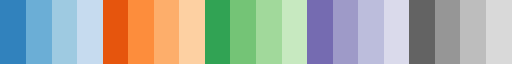

In [12]:
cm.tab20c

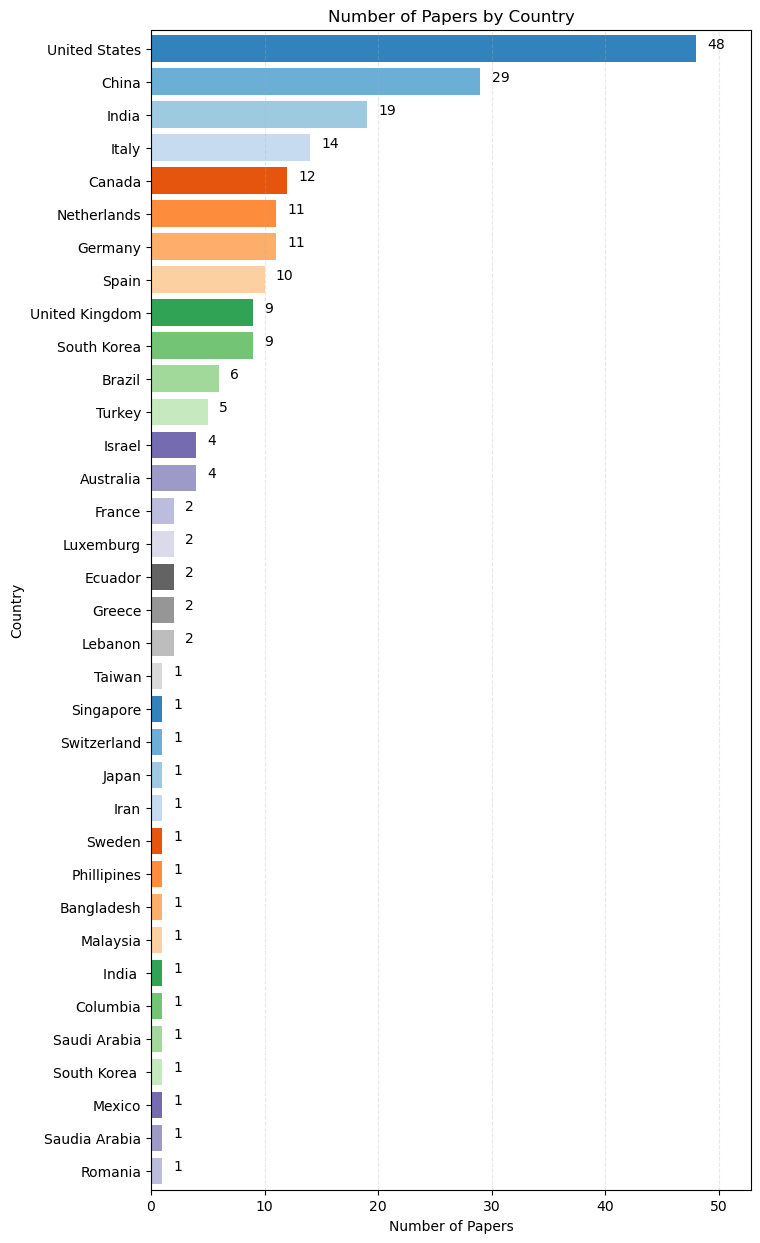

In [13]:
# Plot the horizontal bar graph with spacing between bars
country_counts = df['Country'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(country_counts.index, country_counts.values, color=cm.tab20c.colors[:len(country_counts)])
# Set the x-axis label
max_count = country_counts.max()
plt.xlim(0, max_count + max_count * 0.1)
plt.margins(y=0.005)
# Labels and title with padding
plt.xlabel('Number of Papers')
plt.ylabel('Country')
plt.title('Number of Papers by Country')

for i, v in enumerate(country_counts.values):
        plt.text(v + 1, i, str(v))

# Increase spacing between plot elements if needed
plt.subplots_adjust(left=0.3, right=0.9, top=1.5, bottom=0.05)
plt.grid(axis='x', linestyle='--', alpha=0.3)
# Optional: invert y-axis for descending order
plt.gca().invert_yaxis()
plt.show()

In [14]:
df['MDS'].value_counts()

MDS
PD                                           51
FoG                                          30
TS                                           25
Bradykinesia                                 24
Dyskinesia                                   20
Dystonia                                      9
Dyskinesia, PD                                9
Bradykinesia                                  5
Isolated Dystonia                             5
Ataxia                                        5
Cervical Dystonia                             4
Ataxia (Multiple Sclerosis)                   3
Ataxia (Cerebellar)                           3
Ataxia (Friedreich's)                         2
Ataxia, PD                                    2
ET, PD                                        2
Bradykinesia, PD                              2
ET                                            2
PD                                            2
Ataxia (Cerebellar)                           1
Dyskinesia, Dystonia                

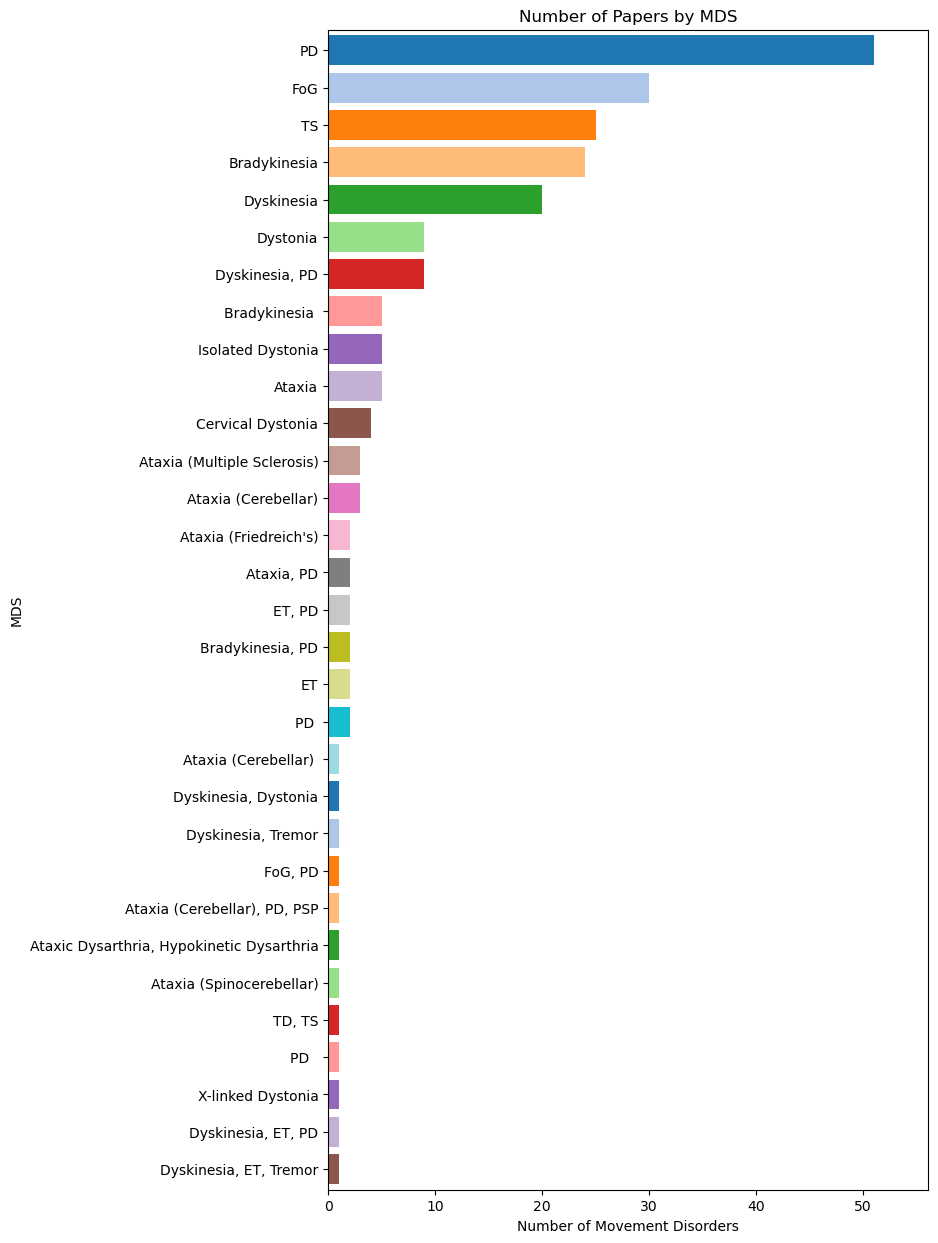

In [15]:
# Plot the horizontal bar graph with spacing between bars
mds_counts = df['MDS'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(mds_counts.index, mds_counts.values, color=cm.tab20.colors[:len(mds_counts)])
# Set the x-axis label
max_count = mds_counts.max()
plt.xlim(0, max_count + max_count * 0.1)
plt.margins(y=0.005)
# Labels and title with padding
plt.xlabel('Number of Movement Disorders')
plt.ylabel('MDS')
plt.title('Number of Papers by MDS')

# for i, v in enumerate(mds_counts.values):
#         plt.text(v + 1, i, str(v))


# Increase spacing between plot elements if needed
plt.subplots_adjust(left=0.3, right=0.9, top=1.5, bottom=0.05)
# plt.grid(axis='x', linestyle='--', alpha=0.3)
# Optional: invert y-axis for descending order
plt.gca().invert_yaxis()
plt.show()

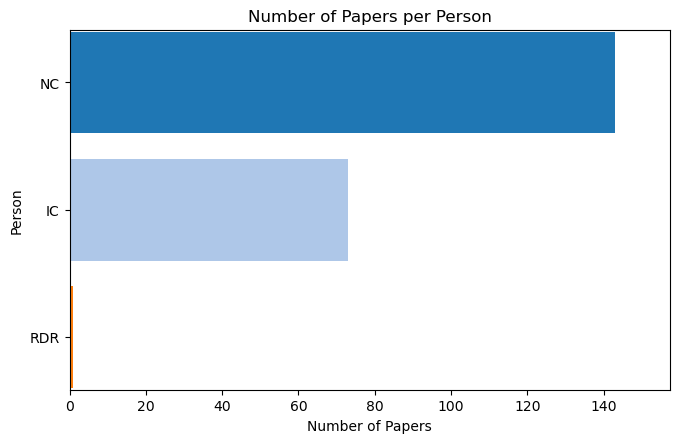

In [16]:
# Plot the horizontal bar graph with spacing between bars
person_counts = df['Person'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(person_counts.index, person_counts.values, color=cm.tab20.colors[:len(person_counts)])
# Set the x-axis label
max_count = person_counts.max()
plt.xlim(0, max_count + max_count * 0.1)
plt.margins(y=0.005)
# Labels and title with padding
plt.xlabel('Number of Papers')
plt.ylabel('Person')
plt.title('Number of Papers per Person')

# for i, v in enumerate(person_counts.values):
#         plt.text(v + 1, i, str(v))

# Increase spacing between plot elements if needed
plt.subplots_adjust(left=0.3, right=0.9, top=0.5, bottom=0.05)
# plt.grid(axis='x', linestyle='--', alpha=0.3)
# Optional: invert y-axis for descending order
plt.gca().invert_yaxis()
plt.show()

In [17]:
def GetCategoriesSum(df, category_name: str):
    category = dict()

    for entry in df[category_name]:
        if pd.isnull(entry):
            continue  

        items = entry.split(',')
        for item in items:
            item = item.strip() 
            if item:  
                if item in category:
                    category[item] += 1
                else:
                    category[item] = 1
                    
    return category



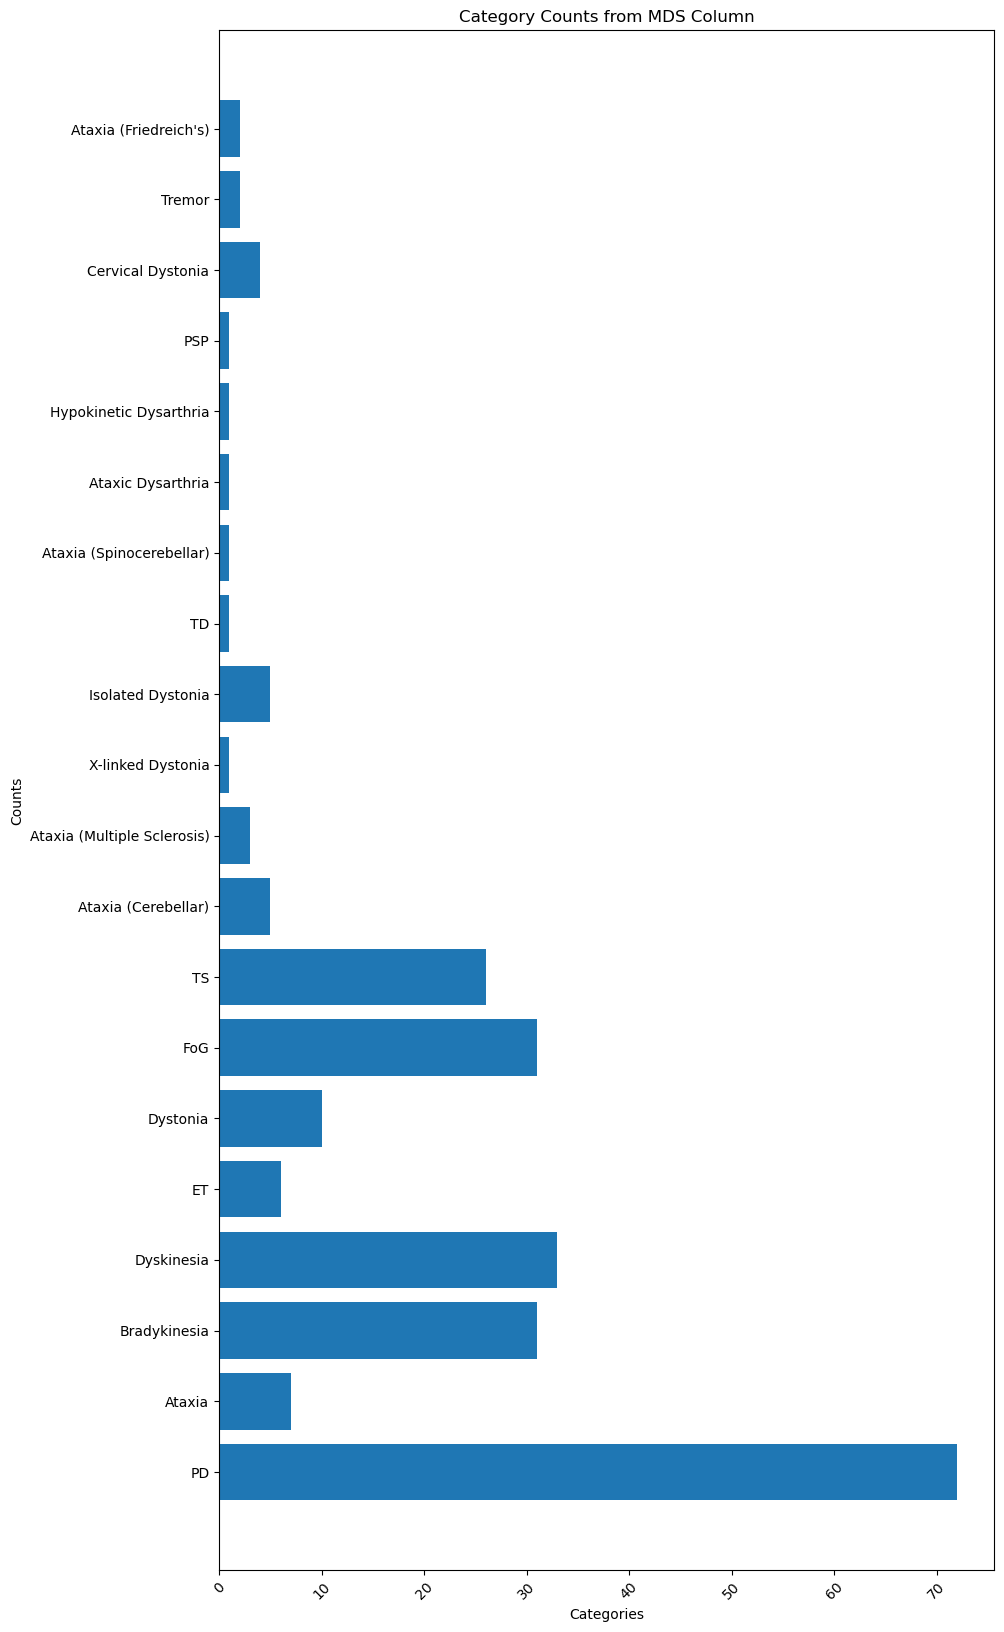

In [18]:
category_counts = GetCategoriesSum(df, "MDS")
category_counts_series = pd.Series(category_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 20))
plt.barh(category_counts_series.index, category_counts_series.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts from MDS Column')
plt.xticks(rotation=45)
plt.show()

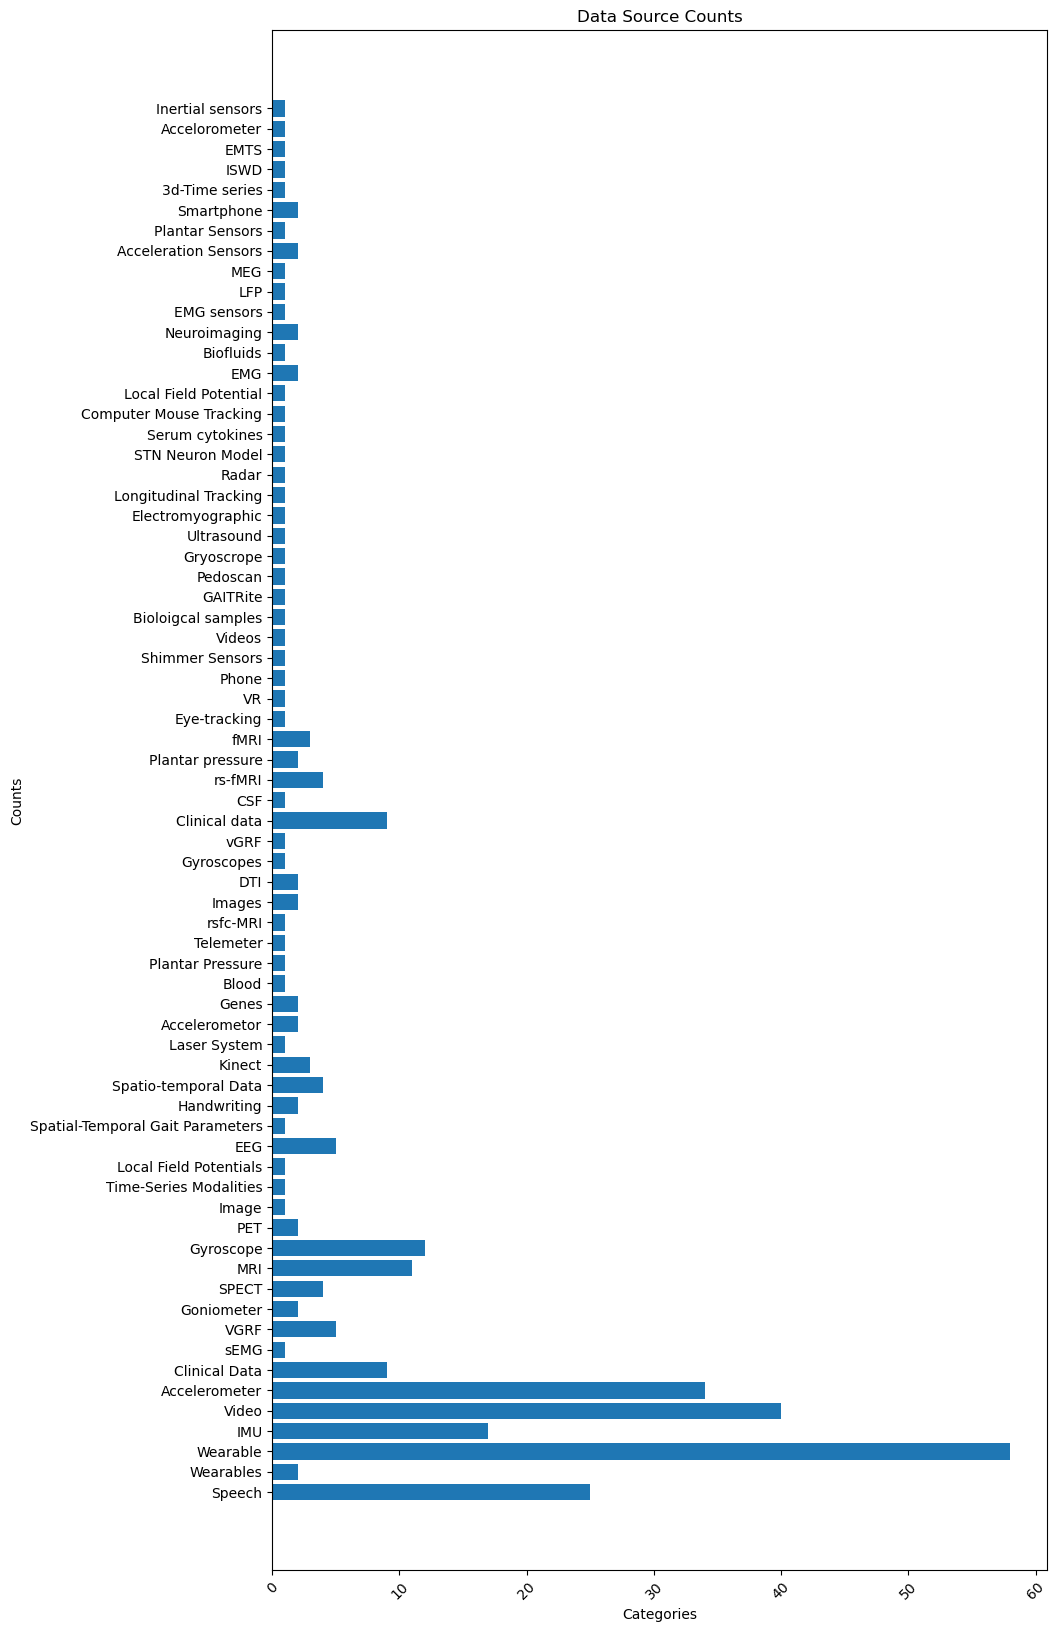

In [19]:
category_counts = GetCategoriesSum(df, "Data Source Secondary")

# Convert dictionary to Series for plotting
category_counts_series = pd.Series(category_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 20))
plt.barh(category_counts_series.index, category_counts_series.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Data Source Counts')
plt.xticks(rotation=45)
plt.show()